In [ ]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

# Machine Learning
import sklearn.metrics as metrics

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')

from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from nltk.corpus import stopwords

from IPython.display import display

%pip install svgling
%pip install datasets

pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from datasets import load_dataset

babe_dataset = load_dataset("mediabiasgroup/BABE-v3")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# convert to df
babe_df = pd.DataFrame(babe_dataset['train'])
babe_df_cleaned = babe_df[['text', 'topic']]

babe_df_cleaned.loc[:, 'topic'] = babe_df_cleaned.loc[:, 'topic'].apply(lambda x: " ".join(x.split("-")))

# print number of unique topics
print("Number of unique topics:", len(babe_df_cleaned['topic'].unique()))

babe_df_cleaned.head()

Number of unique topics: 22


,text,topic
0,But instead of closing loopholes that allow cr...,gun control
1,"""You think I'm joking,"" he continued. """,blm
2,"Yes, the rich are rich and want to stay that w...",taxes
3,Americans are carrying $1.57 trillion in outst...,student debt
4,Republican state legislators from Texas to Ari...,gun control


# Q1

In [ ]:
def make_tokens(df: pd.DataFrame) -> pd.DataFrame:
  ## Your code starts here ##
  df['tokens'] = df['text'].apply(lambda x: nltk.word_tokenize(x))
  df['tokens'] = df['tokens'].apply(lambda x: [word.lower() for word in x])
  ## end ##
  return df

In [ ]:
babe_df_cleaned = make_tokens(babe_df_cleaned)
print(babe_df_cleaned.loc[0, 'tokens'])

['but', 'instead', 'of', 'closing', 'loopholes', 'that', 'allow', 'criminals', 'to', 'access', 'firearms', ',', 'the', 'bill', 'by', 'house', 'democrats', 'could', 'turn', 'millions', 'of', 'law-abiding', 'american', 'gun', 'owners', 'into', 'felons', '.']


# Q2

In [ ]:
def clean_tokens(df: pd.DataFrame) -> pd.DataFrame:
  ## Your code starts here ##
  stop_words = set(stopwords.words("english"))
  df['tokens'] = df['tokens'].apply(lambda row: [word for word in row if word not in stop_words])
  df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha()])

  ## end ##
  return df

In [ ]:
babe_df_cleaned = clean_tokens(babe_df_cleaned)
print(babe_df_cleaned['tokens'].iloc[0])


['instead', 'closing', 'loopholes', 'allow', 'criminals', 'access', 'firearms', 'bill', 'house', 'democrats', 'could', 'turn', 'millions', 'american', 'gun', 'owners', 'felons']


# Q3



In [ ]:
def stem_tokens(df: pd.DataFrame) -> pd.DataFrame:
  ## Your code starts here ##
  from nltk.stem.snowball import SnowballStemmer
  stemmer = SnowballStemmer('english')
  df['tokens_stemmed'] = df['tokens'].apply(lambda row: [stemmer.stem(word) for word in row])
  ## end ##
  return df

In [ ]:
babe_df_cleaned = stem_tokens(babe_df_cleaned)
print(babe_df_cleaned['tokens_stemmed'].iloc[0])

['instead', 'close', 'loophol', 'allow', 'crimin', 'access', 'firearm', 'bill', 'hous', 'democrat', 'could', 'turn', 'million', 'american', 'gun', 'owner', 'felon']


# Q4

## (a)

<Axes: title={'center': 'Zipf Plot'}, xlabel='Words', ylabel='Frequency'>

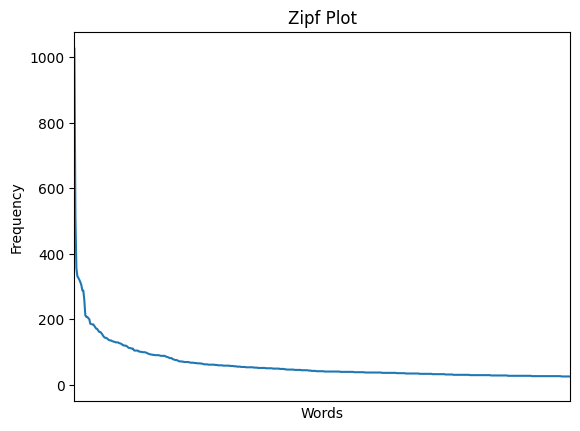

In [ ]:
## Your code starts here ##
# get frequency of all words in dataset
token_count_ng = Counter()

for words in babe_df_cleaned['tokens']:
  token_count_ng.update(words)

# put the frequency of all words in a dataframe
word_freq_ng = pd.DataFrame.from_dict(token_count_ng, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
word_freq_ng.head()
ax = word_freq_ng.plot(legend=False, xlabel='Words', ylabel='Frequency', title="Zipf Plot")
ax.set_xticks([])
ax.set_xlim(0, 500)
ax



## end ##

Enter answer here:

The distribution is called the Zipf distribution.

## (b)

In [ ]:
## Your code starts here ##
word_freq_ng = pd.DataFrame.from_dict(token_count_ng, orient='index', columns=['Frequency']).sort_values(by='Frequency', ascending=False)
word_freq_ng.head(10)


## end ##

,Frequency
trump,1027
president,512
said,357
people,332
would,327
new,321
donald,314
white,305
police,289
coronavirus,288


# Q5

## (a)

In [ ]:
## Your code starts here ##
word_freq_ng['word'] = word_freq_ng.index
topk = [tuple(x) for x in word_freq_ng.head(500).to_numpy()]

# create a binary list for each row in the dataset to indicate if it contains
# each word in the top 500
freqText = []
for entry in babe_df_cleaned['tokens']:
    tempCounter = Counter(entry)
    topkinText = [1 if tempCounter[word] > 0 else 0 for (wordCount,word) in topk]
    freqText.append(topkinText)


# Turn these lists into a DataFrame
freqTextDf = pd.DataFrame(freqText)
dfName = []
for c in topk:
    dfName.append(c[1])
freqTextDf.columns = dfName

# Merge DataFrame with dataset DataFrame
finalTextDf = babe_df_cleaned[['text', 'topic','tokens']].join(freqTextDf)
finalTextDf
def getMI(topk, df, label_column='topic'):
    unique_labels = df[label_column].unique()

    # create a placeholder df
    overallDf = pd.DataFrame()

    # loop through each topic
    for topic in unique_labels:
      miScore = []

      # create a binary column for the current topic
      label_col = df[label_column].copy()
      label_col[label_col != topic] = 0
      label_col[label_col == topic] = 1

      # get the mi score for each word with the current topic
      for word in topk:
          miScore.append([word[1]]+[metrics.mutual_info_score(label_col, df[word[1]])] + [topic])

      # combine the scores of all words for the topic into the df
      miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
      miScoredf.columns = ['Word','MI Score','Topic']
      overallDf = pd.concat([overallDf, miScoredf])

    return overallDf

mi_scores = getMI(topk, finalTextDf)

# show top 5 words for each topic
mi_scores = mi_scores.set_index(['Word']).groupby('Topic')['MI Score'].nlargest(10).reset_index()
mi_scores









## end ##

,Topic,Word,MI Score
0,#metoo,sexual,0.007047
1,#metoo,women,0.003511
2,#metoo,trump,0.001809
3,#metoo,business,0.001152
4,#metoo,accused,0.001135
...,...,...,...
215,white nationalism,police,0.001917
216,white nationalism,biden,0.001917
217,white nationalism,culture,0.001852
218,white nationalism,would,0.001767


## (b)

In [ ]:
## Your code starts here ##
token_count_ng2 = Counter()
for words in babe_df_cleaned['tokens_stemmed']:
  token_count_ng2.update(words)

# put the frequency of all words in a dataframe
word_freq_ng2 = pd.DataFrame.from_dict(token_count_ng2, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)

word_freq_ng2['tokens_stemmed'] = word_freq_ng2.index
topk = [tuple(x) for x in word_freq_ng2.head(500).to_numpy()]

freqText = []
for entry in babe_df_cleaned['tokens_stemmed']:
    tempCounter = Counter(entry)
    topkinText = [1 if tempCounter[word] > 0 else 0 for (wordCount,word) in topk]
    freqText.append(topkinText)


# Turn these lists into a DataFrame
freqTextDf = pd.DataFrame(freqText)
dfName = []
for c in topk:
    dfName.append(c[1])
freqTextDf.columns = dfName

# Merge DataFrame with dataset DataFrame
finalTextDf = babe_df_cleaned[['text', 'topic','tokens_stemmed']].join(freqTextDf)
finalTextDf


mi_scores = getMI(topk, finalTextDf)

# show top 5 words for each topic
mi_scores = mi_scores.set_index(['Word']).groupby('Topic')['MI Score'].nlargest(10).reset_index()
mi_scores









## end ##

,Topic,Word,MI Score
0,#metoo,sexual,0.007472
1,#metoo,women,0.003511
2,#metoo,accus,0.001918
3,#metoo,trump,0.001812
4,#metoo,charg,0.001705
...,...,...,...
215,white nationalism,christian,0.002106
216,white nationalism,polic,0.001999
217,white nationalism,tax,0.001928
218,white nationalism,biden,0.001917


## (c)


Enter answer here:

A high MI score indicates that a word can tell us a lot about a given topic. The table from Q5a was more useful in drawing this conclusion as the words were more coherent.